# Yiming Liu

# Problem 1

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import math
sys.path.append('/Users/yimingliu/Downloads/HW5-code/')
import mltools as ml
%matplotlib inline

# Problem_1

In [14]:
# (a)

iris = np.genfromtxt("/Users/yimingliu/Downloads/HW5-code/data/iris.txt",delimiter=None)

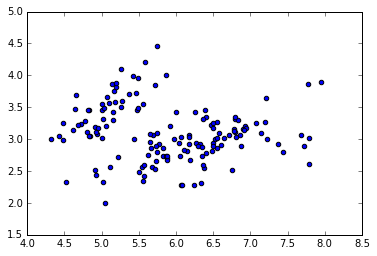

In [18]:
plt.scatter(iris[:,0],iris[:,1]) # plot the data
data=iris[:,(0,1)]

It seems there might exist at least two potential clusters within our data

In [64]:
#(b)

# K-means with K=5

(index1,center1,cost1)=ml.cluster.kmeans(data,5,init='random')
# initialize with K random data points (uniformly) as clusters
(index2,center2,cost2)=ml.cluster.kmeans(data,5,init='farthest')
# initialize by choosing cluster 1 uniformly, 
# then the point farthest from all clusters so far, etc.


(index3,center3,cost3)=ml.cluster.kmeans(data,5,init='k++')
# initialize by choosing cluster 1 uniformly, 
# then points randomly proportional to distance from current clusters


In [80]:
[cost1,cost2,cost3]
## initialize by K++, seems to result in the the lowest cost, albeit by a small margin
# Thus in this specific instance, the optimal clustering result is the one produced 
# by 'k++' initialization


[25.138941899584196, 27.520112117828639, 23.880791389200649]

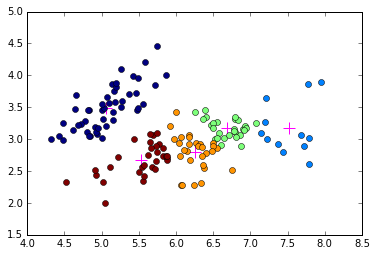

In [72]:
ml.plotClassify2D(None,data,index1) 
# clustering result plot when initialize by 'random'
# centers are indicated by '+'
plt.scatter(center1[:,0],center1[:,1],marker='+',c='magenta',s=160)

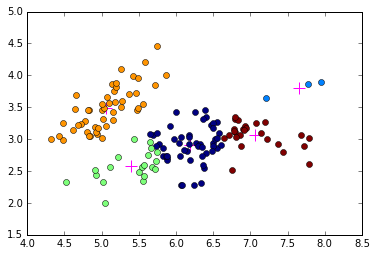

In [73]:
ml.plotClassify2D(None,data,index2) 
# clustering result plot when initialize by 'frathest'
# centers are indicated by '+'
plt.scatter(center2[:,0],center2[:,1],marker='+',c='magenta',s=160)

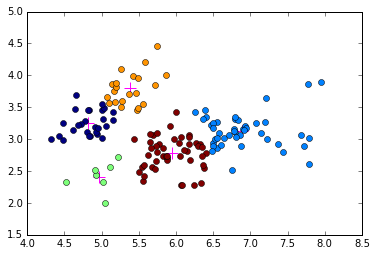

In [74]:
ml.plotClassify2D(None,data,index3) 
## clustering result plot when initialize by 'k++'(the best result)
# centers are indicated by '+'
plt.scatter(center3[:,0],center3[:,1],marker='+',c='magenta',s=160)

In [75]:
# K-means with K=20

(index4,center4,cost4)=ml.cluster.kmeans(data,20,init='random')
# initialize with K random data points (uniformly) as clusters
(index5,center5,cost5)=ml.cluster.kmeans(data,20,init='farthest')
# initialize by choosing cluster 1 uniformly, 
# then the point farthest from all clusters so far, etc.


(index6,center6,cost6)=ml.cluster.kmeans(data,20,init='k++')
# initialize by choosing cluster 1 uniformly, then points 
# randomly proportional to distance from current clusters



In [76]:
[cost4,cost5,cost6]
## initialize by 'random' results in the the lowest cost, albeit by a small margin
# Thus in this specific instance, the optimal clustering result is the one produced 
# by 'random' initialization

[4.246154274106364, 4.5041054464253376, 4.9868947773270431]

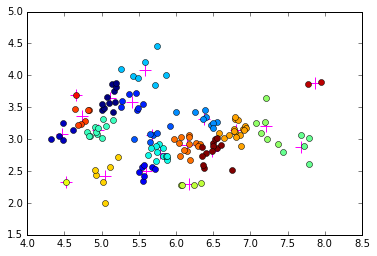

In [77]:
ml.plotClassify2D(None,data,index4) 
# clustering result plot when initialize by 'random'(the best result)
# centers are indicated by '+'
plt.scatter(center4[:,0],center4[:,1],marker='+',c='magenta',s=160)

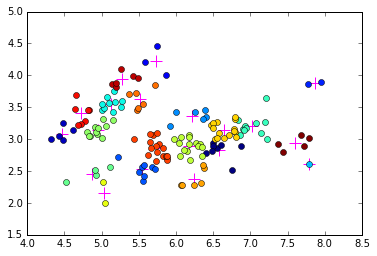

In [78]:
ml.plotClassify2D(None,data,index5) 
# clustering result plot when initialize by 'farthest'
# centers are indicated by '+'
plt.scatter(center5[:,0],center5[:,1],marker='+',c='magenta',s=160)

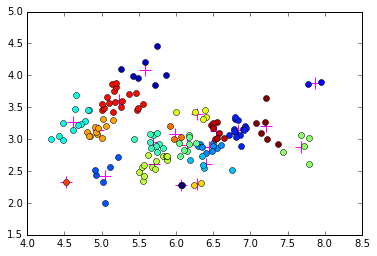

In [79]:
ml.plotClassify2D(None,data,index6) 
# clustering result plot when initialize by 'k++'
# centers are indicated by '+'
plt.scatter(center6[:,0],center6[:,1],marker='+',c='magenta',s=160)

In [83]:
# (c)

# k=5

# agglomerative clustering by single linkage

(result1,join1)=ml.cluster.agglomerative(data,5,method='min')

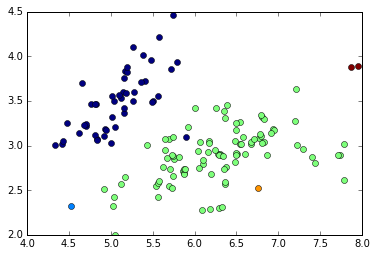

In [84]:
ml.plotClassify2D(None,data,result1) 
# clustering result plot under single linkage

In [85]:
# agglomerative clustering by complete linkage

(result2,join2)=ml.cluster.agglomerative(data,5,method='max')

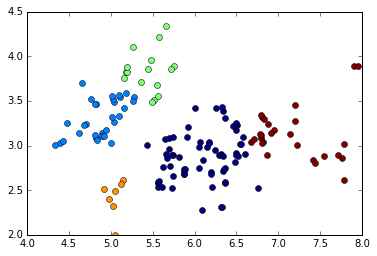

In [86]:
ml.plotClassify2D(None,data,result2) 
# clustering result plot under complete linkage

In [87]:

# k=20

# agglomerative clustering by single linkage

(result3,join3)=ml.cluster.agglomerative(data,20,method='min')

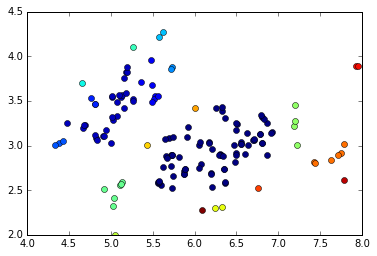

In [88]:
ml.plotClassify2D(None,data,result3) 
# clustering result plot under single linkage

In [89]:
# agglomerative clustering by complete linkage

(result4,join4)=ml.cluster.agglomerative(data,20,method='max')

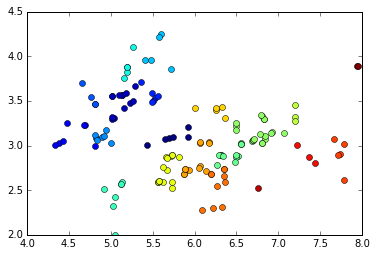

In [90]:
ml.plotClassify2D(None,data,result4) 
# clustering result plot under complete linkage

From above results, comparing complete linkage to single linkage, we can see, complete linkage is much more effective in subdividing data points into multiple clusters than single linkage. Single linkage, on the other hand, exhibits difficulty in subdividing major clusters. As shown from above plots, single linkage often assigns most data points to two major clusters while leaving very few boundary data points to form several very small clusters. In general, single linkage is computationally efficient and good at detecting big patterns, while complete linkage is more computationally complex, but better at detecting subtlties.

Comparing agglomerative and k-means, they operate with different philosophies. Agglomerative starts with maximal number of clusters possible, and then begins to merge different clusters by recognizing their similarities til obtaining our desired number of clusters . K-means on the other hand, starts with pre-specified number of clusters, and then updates those clusters. In terms of above plots, we can see k-means and agglomerative under complete linakge produce similar results, while single linkage, due to its ineffectiveness in subdividing big clusters, produces a very different result from k-means. In terms of this particular dataset, k-means' performance seems to be rather consistent under fixed K, while agglomerative method's performance depends heavily on the appropriateness of measure of similarities and intended number of clusters K.


# problem_2

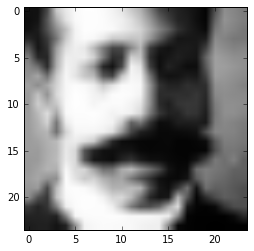

In [164]:
X = np.genfromtxt("/Users/yimingliu/Downloads/HW5-code/data/faces.txt", 
                  delimiter=None) # load face dataset
plt.figure()
img = np.reshape(X[1,:],(24,24)) # convert vectorized data point to 24x24 image patch
plt.imshow( img.T , cmap="gray") # display image patch; you may have to squin:

In [125]:
#(a)

# Center the data
mu = np.mean(X, axis=0 ,keepdims=True)
X0=X-mu

In [126]:
# (b)

# Singular value decomposition of X0
from scipy.linalg import svd
U,S,Vh =svd(X0, False)
W=U.dot( np.diag(S) )


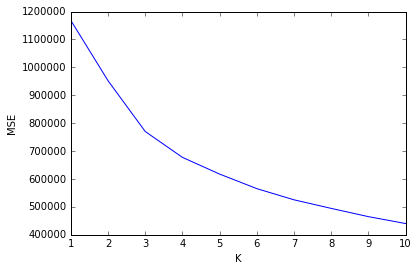

In [146]:
# (c)
MSE=[]
k=np.arange(1,11)
for i in k:
    X_hat=np.dot(W[:,:i],Vh[:i,:])
    mse=np.sum((X0-X_hat)**2)/X0.shape[0]
    MSE.append(mse)
plt.plot(k,MSE)
plt.xlabel('K')
plt.ylabel('MSE')
                 

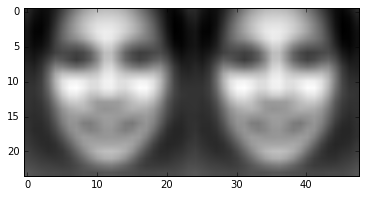

In [159]:
# (d)


# along First principal direction

alpha=2*np.median(np.abs(W[:,0]))

D1_1=mu+alpha*Vh[0,:]
D1_2=mu-alpha*Vh[0,:]
# convert vectorized data point to 24x24 image patch
img_1 = np.reshape(D1_1,(24,24)) 
img_2=np.reshape(D1_1,(24,24))


plot_image = np.concatenate((img_1, img_2), axis=0)
plt.figure()
plt.imshow(plot_image.T,cmap="gray")


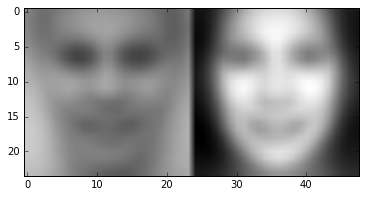

In [160]:
# along Second principal direction

alpha=2*np.median(np.abs(W[:,1]))

D1=mu+alpha*Vh[1,:]
D2=mu-alpha*Vh[1,:]
 # convert vectorized data point to 24x24 image patch
img_1 = np.reshape(D1,(24,24)) 
img_2=np.reshape(D2,(24,24))


plot_image = np.concatenate((img_1, img_2), axis=0)
plt.figure()
plt.imshow(plot_image.T,cmap="gray")

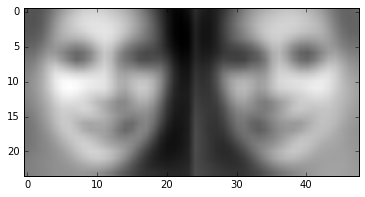

In [161]:
# along Third principal direction
alpha=2*np.median(np.abs(W[:,2]))

D1=mu+alpha*Vh[2,:]
D2=mu-alpha*Vh[2,:]
# convert vectorized data point to 24x24 image patch
img_1 = np.reshape(D1,(24,24))
img_2=np.reshape(D2,(24,24))


plot_image = np.concatenate((img_1, img_2), axis=0)
plt.figure()
plt.imshow(plot_image.T,cmap="gray")

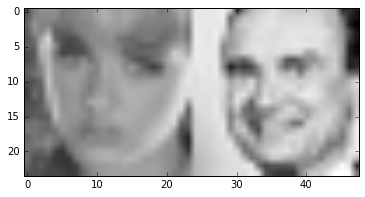

In [162]:
# (e)


# Choose faces 666 and 777

plt.figure()
# convert vectorized data point to 24x24 image patch
img_1 = np.reshape(X[666,:],(24,24)) 
img_2= np.reshape(X[777,:],(24,24)) 

# Display target faces
plot_image = np.concatenate((img_1, img_2), axis=0)
plt.figure()
plt.imshow(plot_image.T,cmap="gray")


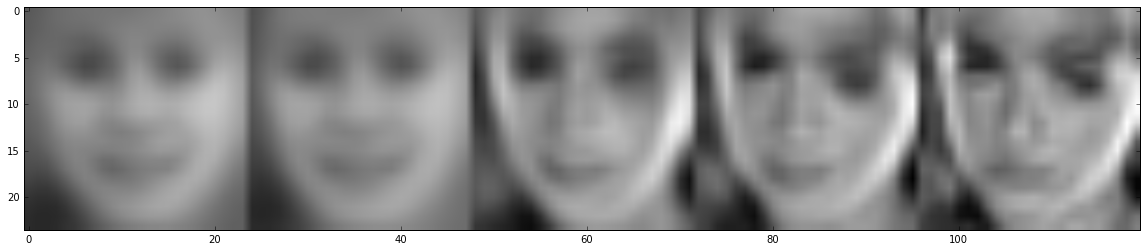

In [169]:
# Reconstruct face 666
face_hat=[]
K=[5,10,50,100,200] # Number of principal components considered
for k in K:
    X_hat=np.dot(W[:,:k],Vh[:k,:])
    face_hat.append(np.reshape(X_hat[666,:]+mu,(24,24)))

plot_image=np.concatenate((face_hat[0], face_hat[1],face_hat[2],
                           face_hat[3],face_hat[4]), axis=0) 
plt.figure(figsize=(20,10))
plt.imshow(plot_image.T,cmap="gray")

# Display the reconstructed faces as k increases

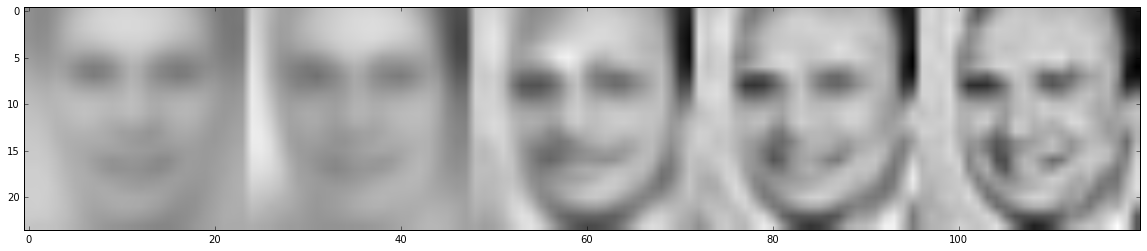

In [170]:
# Reconstruct face 777
face_hat=[]
K=[5,10,50,100,200] # Number of principal components considered
for k in K:
    X_hat=np.dot(W[:,:k],Vh[:k,:])
    face_hat.append(np.reshape(X_hat[777,:]+mu,(24,24)))

plot_image=np.concatenate((face_hat[0], face_hat[1],face_hat[2],
                           face_hat[3],face_hat[4]), axis=0) 
plt.figure(figsize=(20,10))
plt.imshow(plot_image.T,cmap="gray")

# Display the reconstructed faces as k increases

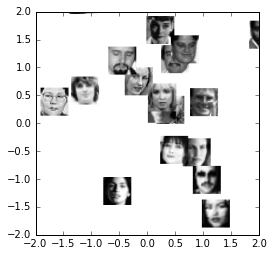

In [175]:
# (f)


idx =np.random.choice(X.shape[0],20) 
# pick some data at random or otherwise; get list / vector of integer indices
import mltools.transforms
coord,params = ml.transforms.rescale( W[:,0:2] ) 
# normalize scale of "W" locations
for i in idx:
    
    loc = (coord[i,0],coord[i,0]+0.5, coord[i,1],coord[i,1]+0.5) 
    # where to place the image & size
    img = np.reshape( X[i,:], (24,24) )
    plt.imshow( img.T , cmap="gray", extent=loc ) 
    # draw each image
    plt.axis( (-2,2,-2,2) ) 
    # set axis to reasonable visual scale